## Church Prediction Project Deployment

##### Objective: Develop a machine learning model to predict church attendance and deploy it using a Streamlit app for real-time user interaction.

### Importing library and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_C.csv')

### Data understanding

In [3]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [4]:
df.tail()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
41253,41253,55217,15641043,Onyemere,641.0,Germany,Male,38.0,2,138166.30,2,0,1,69227.66,0
41254,41254,110969,15674541,Robinson,575.0,France,Male,52.0,8,0.00,2,0,1,111342.66,0
41255,41255,132494,15700601,Kao,571.0,France,Male,34.0,1,119452.03,2,1,1,173511.72,0
41256,41256,31177,15806926,Nkemjika,624.0,France,Male,38.0,4,0.00,1,0,0,40320.30,0
41257,41257,154294,15696231,Chiwetelu,668.0,France,Male,29.0,7,105405.97,1,1,1,149853.89,0


In [5]:
df.shape

(41258, 15)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


This DataFrame provides details about customers, including:

- `Unnamed: 0`: Row index.
- `id`: Customer ID.
- `CustomerId`: Additional identifier for the customer.
- `Surname`: Customer's last name.
- `CreditScore`: Customer's credit score.
- `Geography`: Customer's location or country.
- `Gender`: Customer's gender.
- `Age`: Customer's age.
- `Tenure`: Years as a client with the company.
- `Balance`: Account balance.
- `NumOfProducts`: Number of products owned with the company.
- `HasCrCard`: Indicates if the customer has a credit card (1 for yes, 0 for no).
- `IsActiveMember`: Indicates if the customer is an active member (1 for yes, 0 for no).
- `EstimatedSalary`: Estimated customer income.
churn: Indicates if the customer has stopped using the service (1 for yes, 0 for no).<br><br>
The target column is `churn`.

In [8]:
df.isnull().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

We can observe that there are 1 columns with missing values, namely: `CreditScore`.

In [9]:
for i in df.columns:
  print(df[i].value_counts())

Unnamed: 0
41257    1
0        1
1        1
2        1
3        1
        ..
13       1
14       1
15       1
16       1
17       1
Name: count, Length: 41258, dtype: int64
id
154294    1
157138    1
116144    1
145603    1
79929     1
         ..
144365    1
114901    1
93797     1
110723    1
64816     1
Name: count, Length: 41258, dtype: int64
CustomerId
15682355    32
15756901    29
15641490    26
15804787    26
15690169    25
            ..
15596817     1
15680755     1
15592928     1
15757771     1
15770104     1
Name: count, Length: 13212, dtype: int64
Surname
Hsia         636
T'ien        571
Maclean      430
Kao          405
Hs?          397
            ... 
Thornton       1
Lipton         1
Etheridge      1
Crotty         1
Renwick        1
Name: count, Length: 2272, dtype: int64
CreditScore
850.0    594
678.0    561
684.0    459
667.0    408
683.0    395
        ... 
441.0      1
367.0      1
423.0      1
405.0      1
427.0      1
Name: count, Length: 444, dtype: int64
Geogr

### Data Preprocessing


In the previous code, we observed that the `Unnamed: 0`, `id`, `CustomerId`, and `Surname` columns have a high number of unique values because it is unique to each customer, which can adversely affect the machine learning model's performance. Therefore, it's crucial to drop these columns to enhance the model's optimality.

In [10]:
df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis =1, inplace=True)

In [11]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0


We can see that both of the columns is already dropped

### Data Splitting


Splitting the dataset into training and test sets before delving into exploratory data analysis (EDA) and feature engineering is essential for constructing robust and dependable machine learning models.

In [12]:
input_df = df.drop('churn', axis = 1)
output_df = df['churn']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.20, random_state = 42)

### Feature Engineering

##### Fill in Missing Values

In [14]:
x_train.isnull().sum()

CreditScore        9
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [15]:
x_test.isnull().sum()

CreditScore        3
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [16]:
cols = ['CreditScore']

def count_outliers_iqr(df):
    outliers_count = {}
    for col in df[cols]:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(x_train)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in df[cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

Percentage of outliers in each column:
CreditScore : 0.11%


In [17]:
cols = ['CreditScore']

def count_outliers_iqr(df):
    outliers_count = {}
    for col in df[cols]:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(x_test)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in df[cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

Percentage of outliers in each column:
CreditScore : 0.03%


We can see that both `CreditScore` in x_train and x_test has an outlier

In [18]:
x_train['CreditScore'].fillna(x_train['CreditScore'].median(), inplace=True)
x_test['CreditScore'].fillna(x_test['CreditScore'].median(), inplace=True)

In [19]:
x_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [20]:
x_test.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

##### Scaling


To address the varying ranges in the columns and potential bias in the model, scaling is necessary. For columns without outliers, MinMaxScaler is suitable, while RobustScaler is more appropriate for columns with outliers. This approach ensures that the data is normalized effectively, reducing the impact of differing ranges on the model's performance.

In [25]:
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

def count_outliers_iqr(df):
    outliers_count = {}
    for col in df[cols]:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(x_test)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in df[cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

Percentage of outliers in each column:
CreditScore : 0.03%
Age : 0.59%
Tenure : 0.00%
Balance : 0.00%
NumOfProducts : 0.06%
EstimatedSalary : 0.00%


In [26]:
from sklearn.preprocessing import RobustScaler
columns = ['CreditScore', 'Age', 'NumOfProducts']

scaler = RobustScaler()

x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

In [27]:
from sklearn.preprocessing import MinMaxScaler
columns = ['Tenure', 'Balance', 'EstimatedSalary']

scaler = MinMaxScaler()

x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

### Encoding

In [21]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8252 entries, 22930 to 28660
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8252 non-null   float64
 1   Geography        8252 non-null   object 
 2   Gender           8252 non-null   object 
 3   Age              8252 non-null   float64
 4   Tenure           8252 non-null   int64  
 5   Balance          8252 non-null   float64
 6   NumOfProducts    8252 non-null   int64  
 7   HasCrCard        8252 non-null   int64  
 8   IsActiveMember   8252 non-null   int64  
 9   EstimatedSalary  8252 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 709.2+ KB


In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33006 entries, 15731 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33006 non-null  float64
 1   Geography        33006 non-null  object 
 2   Gender           33006 non-null  object 
 3   Age              33006 non-null  float64
 4   Tenure           33006 non-null  int64  
 5   Balance          33006 non-null  float64
 6   NumOfProducts    33006 non-null  int64  
 7   HasCrCard        33006 non-null  int64  
 8   IsActiveMember   33006 non-null  int64  
 9   EstimatedSalary  33006 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB


After seeing `x_test.info()` and `x_train.info()` we can see that  there are 2 columns that has `object` data type. So we need to fix it.

In [23]:
x_train['Geography'].value_counts()

Geography
France     18788
Spain       7213
Germany     7005
Name: count, dtype: int64

In [24]:
x_train['Gender'].value_counts()

Gender
Male      18532
Female    14474
Name: count, dtype: int64

We can see that `Geography` has 3 values and `Gender` has 2 values. Because both of them has no ordinal values, for `Geography` we will use one-hot encoding and for `Gender` we will use binary encoding because it only has 2 values.

##### One Hot Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
x = x_train[['Geography']]
train_geo_encoded = OneHotEncoder()
train_data = pd.DataFrame(train_geo_encoded.fit_transform(x).toarray(),columns=train_geo_encoded.get_feature_names_out())
x_train = x_train.reset_index()
x_train = pd.concat([x_train,train_data], axis=1)

In [29]:
x_train.head(1)

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,15731,0.584071,Spain,Female,-0.6,0.2,0.0,0.0,0,0,0.359127,0.0,0.0,1.0


In [30]:
x = x_test[['Geography']]
test_data = pd.DataFrame(train_geo_encoded.transform(x).toarray(),columns=train_geo_encoded.get_feature_names_out())
x_test = x_test.reset_index()
x_test = pd.concat([x_test,test_data], axis=1)

In [31]:
x_test.head(1)

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,22930,1.132743,France,Male,-0.1,0.6,0.716648,-1.0,0,1,0.506849,1.0,0.0,0.0


We will drop the original `Geography` column because we already did the encoding

In [32]:
x_train = x_train.drop(['Geography'], axis =1)
x_test = x_test.drop(['Geography'], axis =1)

In [33]:
x_train.head(1)

,index,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,15731,0.584071,Female,-0.6,0.2,0.0,0.0,0,0,0.359127,0.0,0.0,1.0


##### Binary Encoding

In [34]:
data_encode = {"Gender": {"Male": 1,"Female": 0}}
x_train = x_train.replace(data_encode)
x_test = x_test.replace(data_encode)

In [35]:
x_train.head(1)

,index,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,15731,0.584071,0,-0.6,0.2,0.0,0.0,0,0,0.359127,0.0,0.0,1.0


In [36]:
x_test.head(1)

,index,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,22930,1.132743,1,-0.1,0.6,0.716648,-1.0,0,1,0.506849,1.0,0.0,0.0


In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33006 entries, 0 to 33005
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              33006 non-null  int64  
 1   CreditScore        33006 non-null  float64
 2   Gender             33006 non-null  int64  
 3   Age                33006 non-null  float64
 4   Tenure             33006 non-null  float64
 5   Balance            33006 non-null  float64
 6   NumOfProducts      33006 non-null  float64
 7   HasCrCard          33006 non-null  int64  
 8   IsActiveMember     33006 non-null  int64  
 9   EstimatedSalary    33006 non-null  float64
 10  Geography_France   33006 non-null  float64
 11  Geography_Germany  33006 non-null  float64
 12  Geography_Spain    33006 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 3.3 MB


In [38]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252 entries, 0 to 8251
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8252 non-null   int64  
 1   CreditScore        8252 non-null   float64
 2   Gender             8252 non-null   int64  
 3   Age                8252 non-null   float64
 4   Tenure             8252 non-null   float64
 5   Balance            8252 non-null   float64
 6   NumOfProducts      8252 non-null   float64
 7   HasCrCard          8252 non-null   int64  
 8   IsActiveMember     8252 non-null   int64  
 9   EstimatedSalary    8252 non-null   float64
 10  Geography_France   8252 non-null   float64
 11  Geography_Germany  8252 non-null   float64
 12  Geography_Spain    8252 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 838.2 KB


In [39]:
x_train.columns

Index(['index', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [40]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 8252 entries, 22930 to 28660
Series name: churn
Non-Null Count  Dtype
--------------  -----
8252 non-null   int64
dtypes: int64(1)
memory usage: 128.9 KB


In [41]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 33006 entries, 15731 to 15795
Series name: churn
Non-Null Count  Dtype
--------------  -----
33006 non-null  int64
dtypes: int64(1)
memory usage: 515.7 KB


The data types has been changed and we can continue to the EDA

### Exploratory Data Analysis

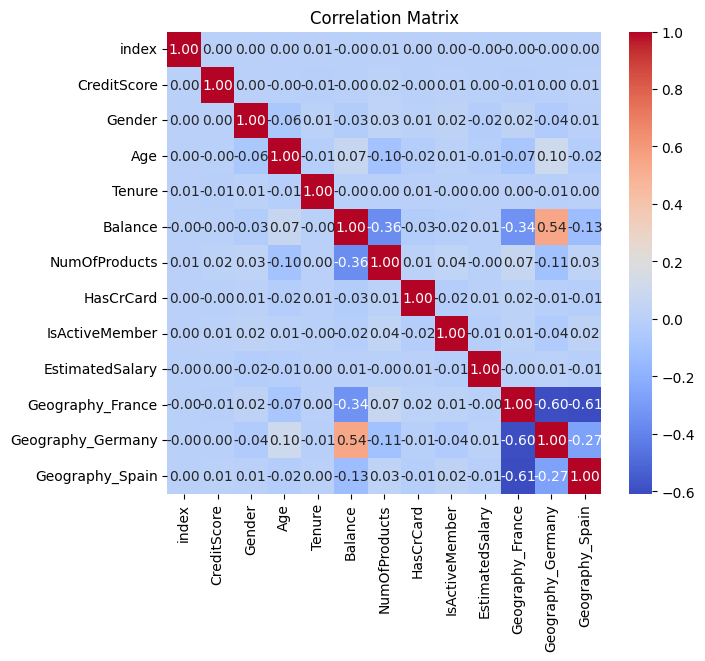

In [42]:
plt.figure(figsize=(7, 6))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Based on the correlation plot there are this insight:
- `Balance` and `Geography_Germany` has high correlation with 0.54 value
<br><br>
The other columns have low correlation to one another unlike `Balance` and `Geography_Germany`.

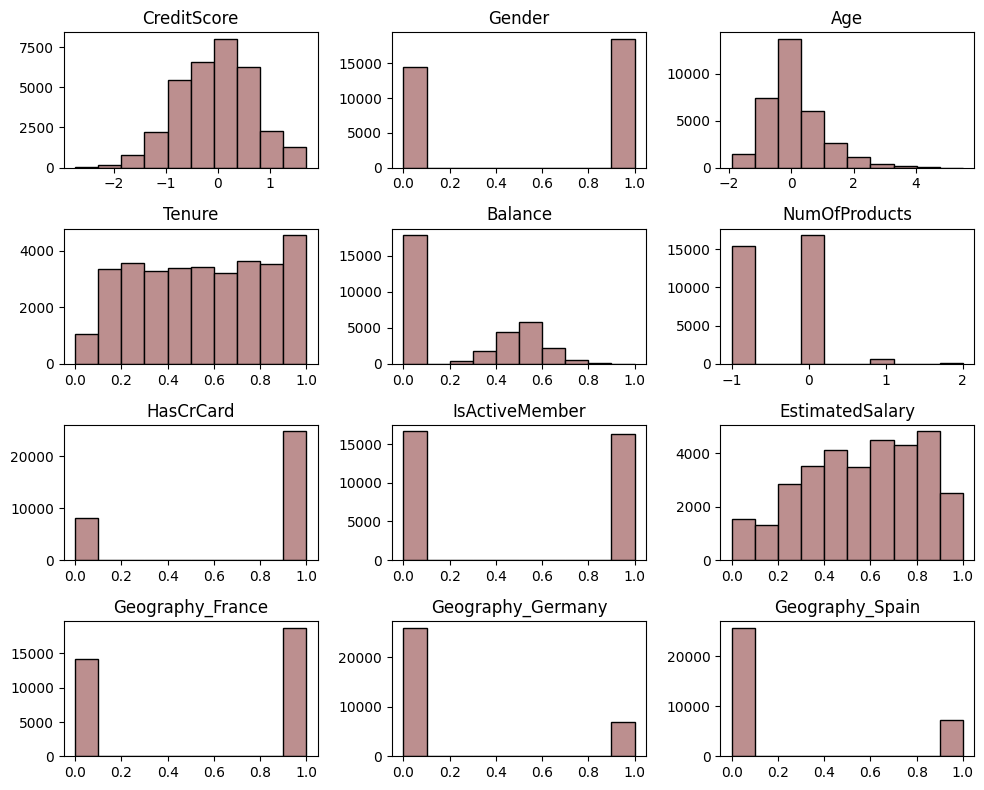

In [43]:
cols = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain']
x_train[cols].hist(figsize=(10, 8), grid=False, color='rosybrown', edgecolor='black')
plt.tight_layout()
plt.show()

- `CreditScore` exhibits a normally skewed distribution.
- `Gender` is predominantly represented by males.
- `Age` shows a left-skewed distribution, particularly in the 30-40 age range.
- `Tenure` displays an almost even distribution with a noticeable peak in the 9-10 year range.
- `Balance` demonstrates a normally skewed distribution, with a notable peak at zero balance.
- `NumOfProducts` is dominated by the value 2.
- `HasCrCrd` indicates a higher number of customers with credit cards compared to those without.
- `IsActiveMember` shows an even distribution between the values 0 and 1.
- `EstimatedSalary` is right-skewed, particularly in the range of 100,000 to 150,000.
- Among the `Geography` columns, Germany and Spain have the highest counts, with over 20,000, while France has just over 15,000 counts.

### Model

I'll be implementing two models for comparison: a `Random Forest Classifier` and an `XGBoost` model. To optimize their performance, I'll conduct tuning on their parameters and hyperparameters. This approach aims to identify the best configuration for each model, allowing me to choose the most effective one for deployment in the future.

#### Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[4,6,8,10,12],
}

RF_class = RandomForestClassifier()
RF_class = GridSearchCV(RF_class,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)

In [45]:
RF_class.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class.best_params_)
print("Accuracy :",RF_class.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 10}
Accuracy : 0.8609342419683319


In [47]:
from sklearn.metrics import classification_report
RF_class_best = RandomForestClassifier(criterion= 'entropy',max_depth=10)
RF_class_best.fit(x_train,y_train)
y_predict_best = RF_class_best.predict(x_test)
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      6431
           1       0.79      0.51      0.62      1821

    accuracy                           0.86      8252
   macro avg       0.83      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



#### XGBoost

In [49]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 150, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_best = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_best.fit(x_train, y_train)

print("Best parameters found: ", xgb_best.best_params_)
print("Best accuracy found: ", xgb_best.best_score_)

Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best accuracy found:  0.8644791856026176


In [50]:
best_xgb_model = xgb_best.best_estimator_

y_pred_XGbest = best_xgb_model.predict(x_test)

print('\nClassification Report XGBoost\n')
print(classification_report(y_test, y_pred_XGbest, target_names=['0', '1']))


Classification Report XGBoost

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6431
           1       0.77      0.54      0.64      1821

    accuracy                           0.86      8252
   macro avg       0.83      0.75      0.78      8252
weighted avg       0.86      0.86      0.85      8252

